In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
import warnings
warnings.simplefilter(action="ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('/Users/simayozkan/Downloads/penguins.csv')

In [5]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.100,18.700,181.000,3750.000,MALE
1,39.500,17.400,186.000,3800.000,FEMALE
2,40.300,18.000,195.000,3250.000,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.700,19.300,193.000,3450.000,FEMALE


In [6]:
encoder = LabelEncoder()

columns_to_encode = ['sex']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [7]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [8]:
df["culmen_length_mm"].fillna(df["culmen_length_mm"].median(), inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].median(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].median(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].median(), inplace=True)
df["sex"].fillna(df["sex"].median(), inplace=True)

In [9]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

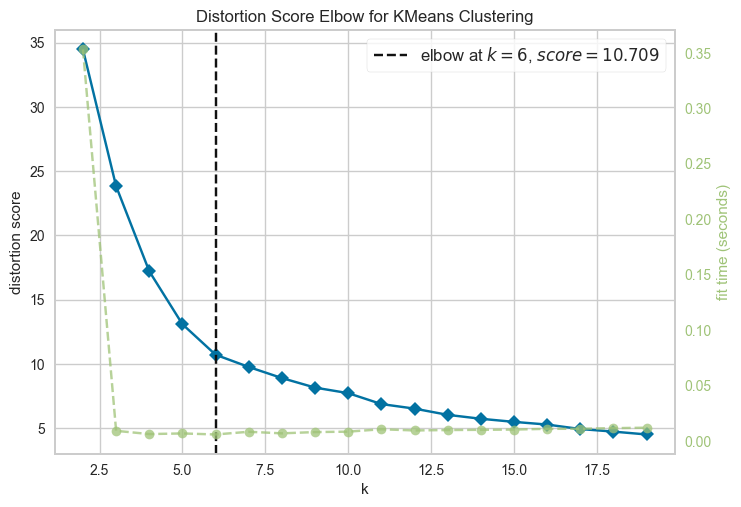

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [16]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_

clusters_kmeans = kmeans.labels_

n_clusters = 6

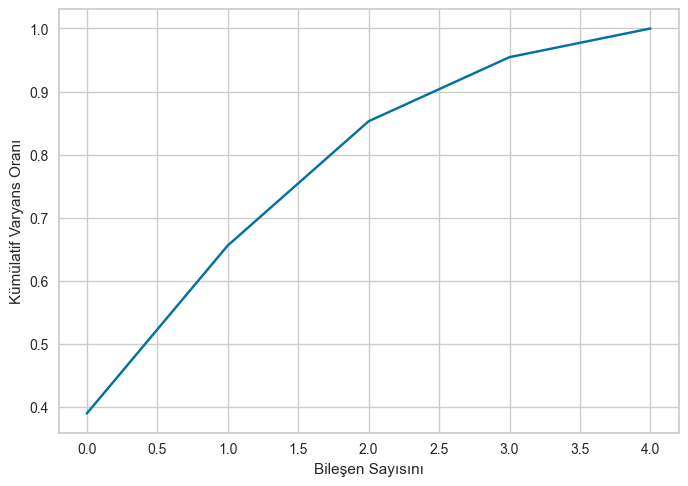

In [17]:
df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [18]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)


array([0.38993746, 0.6560934 , 0.85300134])

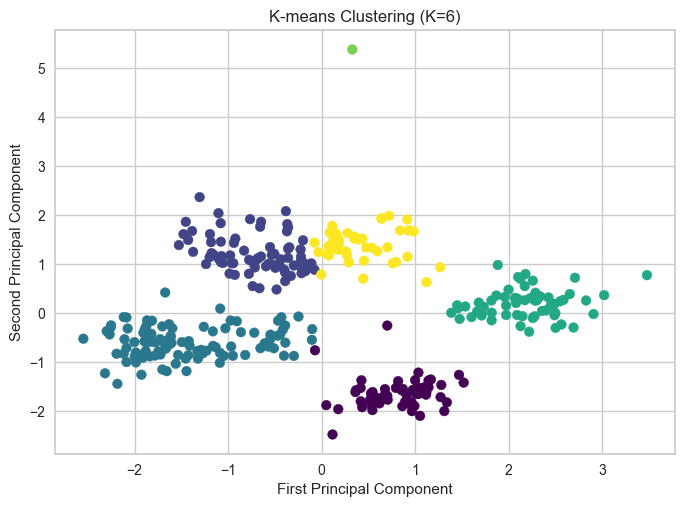

In [19]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pca_fit)
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()